In [1]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd
import json
path0='/content/drive/MyDrive/dblp-ref-0.json'
path1='/content/drive/MyDrive/dblp-ref-1.json'
path2='/content/drive/MyDrive/dblp-ref-2.json'
path3='/content/drive/MyDrive/dblp-ref-3.json'



In [3]:
#for reading the json file in to data frame
with open(path0) as f:
    dblp_data0 = pd.DataFrame(json.loads(line) for line in f)
f.close()

In [4]:
with open(path1) as f:
    dblp_data1 = pd.DataFrame(json.loads(line) for line in f)
f.close()    

In [5]:
with open(path2) as f:
    dblp_data2 = pd.DataFrame(json.loads(line) for line in f)
f.close() 

In [6]:
with open(path3) as f:
    dblp_data3 = pd.DataFrame(json.loads(line) for line in f)
f.close() 

In [ ]:
#concatinating the four data frames
dblp_data_frames = [dblp_data0, dblp_data1, dblp_data2, dblp_data3]

dblp_data = pd.concat(dblp_data_frames)
#droping the unused data in order to save memory
dblp_data3=None
dblp_data2=None
dblp_data1=None
dblp_data0=None


In [8]:
#sample data set for seed value in date of birth
sample_df=dblp_data.sample(20000, random_state = 10141996)

In [21]:
#processing data for known authors graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
#known authors data fetch
map=dict()
#for entire data set
#for i in dblp_data['authors'].values:
#for sample data set
for i in sample_df['authors'].values:  
  #for nan values continue
  if(type(i) == float):
      continue
  for j in i:
    #for nan values continue
    if(type(j) == float):
      continue
    if j not in map:
      map[j]=[]
      map[j]+=i
    else:
      map[j]+=i
     
#remove same authors from the list of values    
for i in map:
  if i in map[i]:
    map[i].remove(i)
#for manual analysis 
#small_keys=list(map.keys())[:8]
small_keys=list(map.keys())
#d={}
#for i in range(len(small_keys)):
#  d[i]=map[small_keys[i]]
#print(d)
#writing to an input file
with open('/content/drive/MyDrive/datasets/graph1_pairs.csv','w',encoding='utf-8') as file:
     for i in small_keys:
       for j in map[i]:
         #removing the self loop edges
         if i==j:
           continue
         else:  
           G.add_edge(i,j)
           file.writelines(str(i)+','+ str(j)+'\n')

    

#ploting the graph

#for sample
#plt.figure(figsize=(10,10)) 
#nx.draw(G,with_labels = True,node_size=50)
#plt.show()
#      for i in small_keys:
#      for j in map[i]:
#         if i==j:
#           continue
#         else:  
#          file.writelines(str(i)+','+ str(j)+'\n')

In [12]:
#function to find the  cliques
import itertools
def find_cliques_size_k(G, k):
  count = 0
  for clique in nx.find_cliques(G):
       if len(clique) == k:
            #print(clique,'---length of clique-------',len(clique))
            count += 1
       elif len(clique) > k: 
            #print(clique,'---length of clique-------',len(clique))    
            count += len(list(itertools.combinations(clique, k)))
  return count

In [11]:
#to find the count for cliques of clique size 3
print(find_cliques_size_k(G,3))

156241


In [12]:
#to find the count for cliques of clique size 4
print(find_cliques_size_k(G,4))

633074


In [13]:
#to find the count for cliques of clique size 5
print(find_cliques_size_k(G,5))

4445638


In [ ]:
#getting crashed
#print(find_cliques_size_k(G,6))

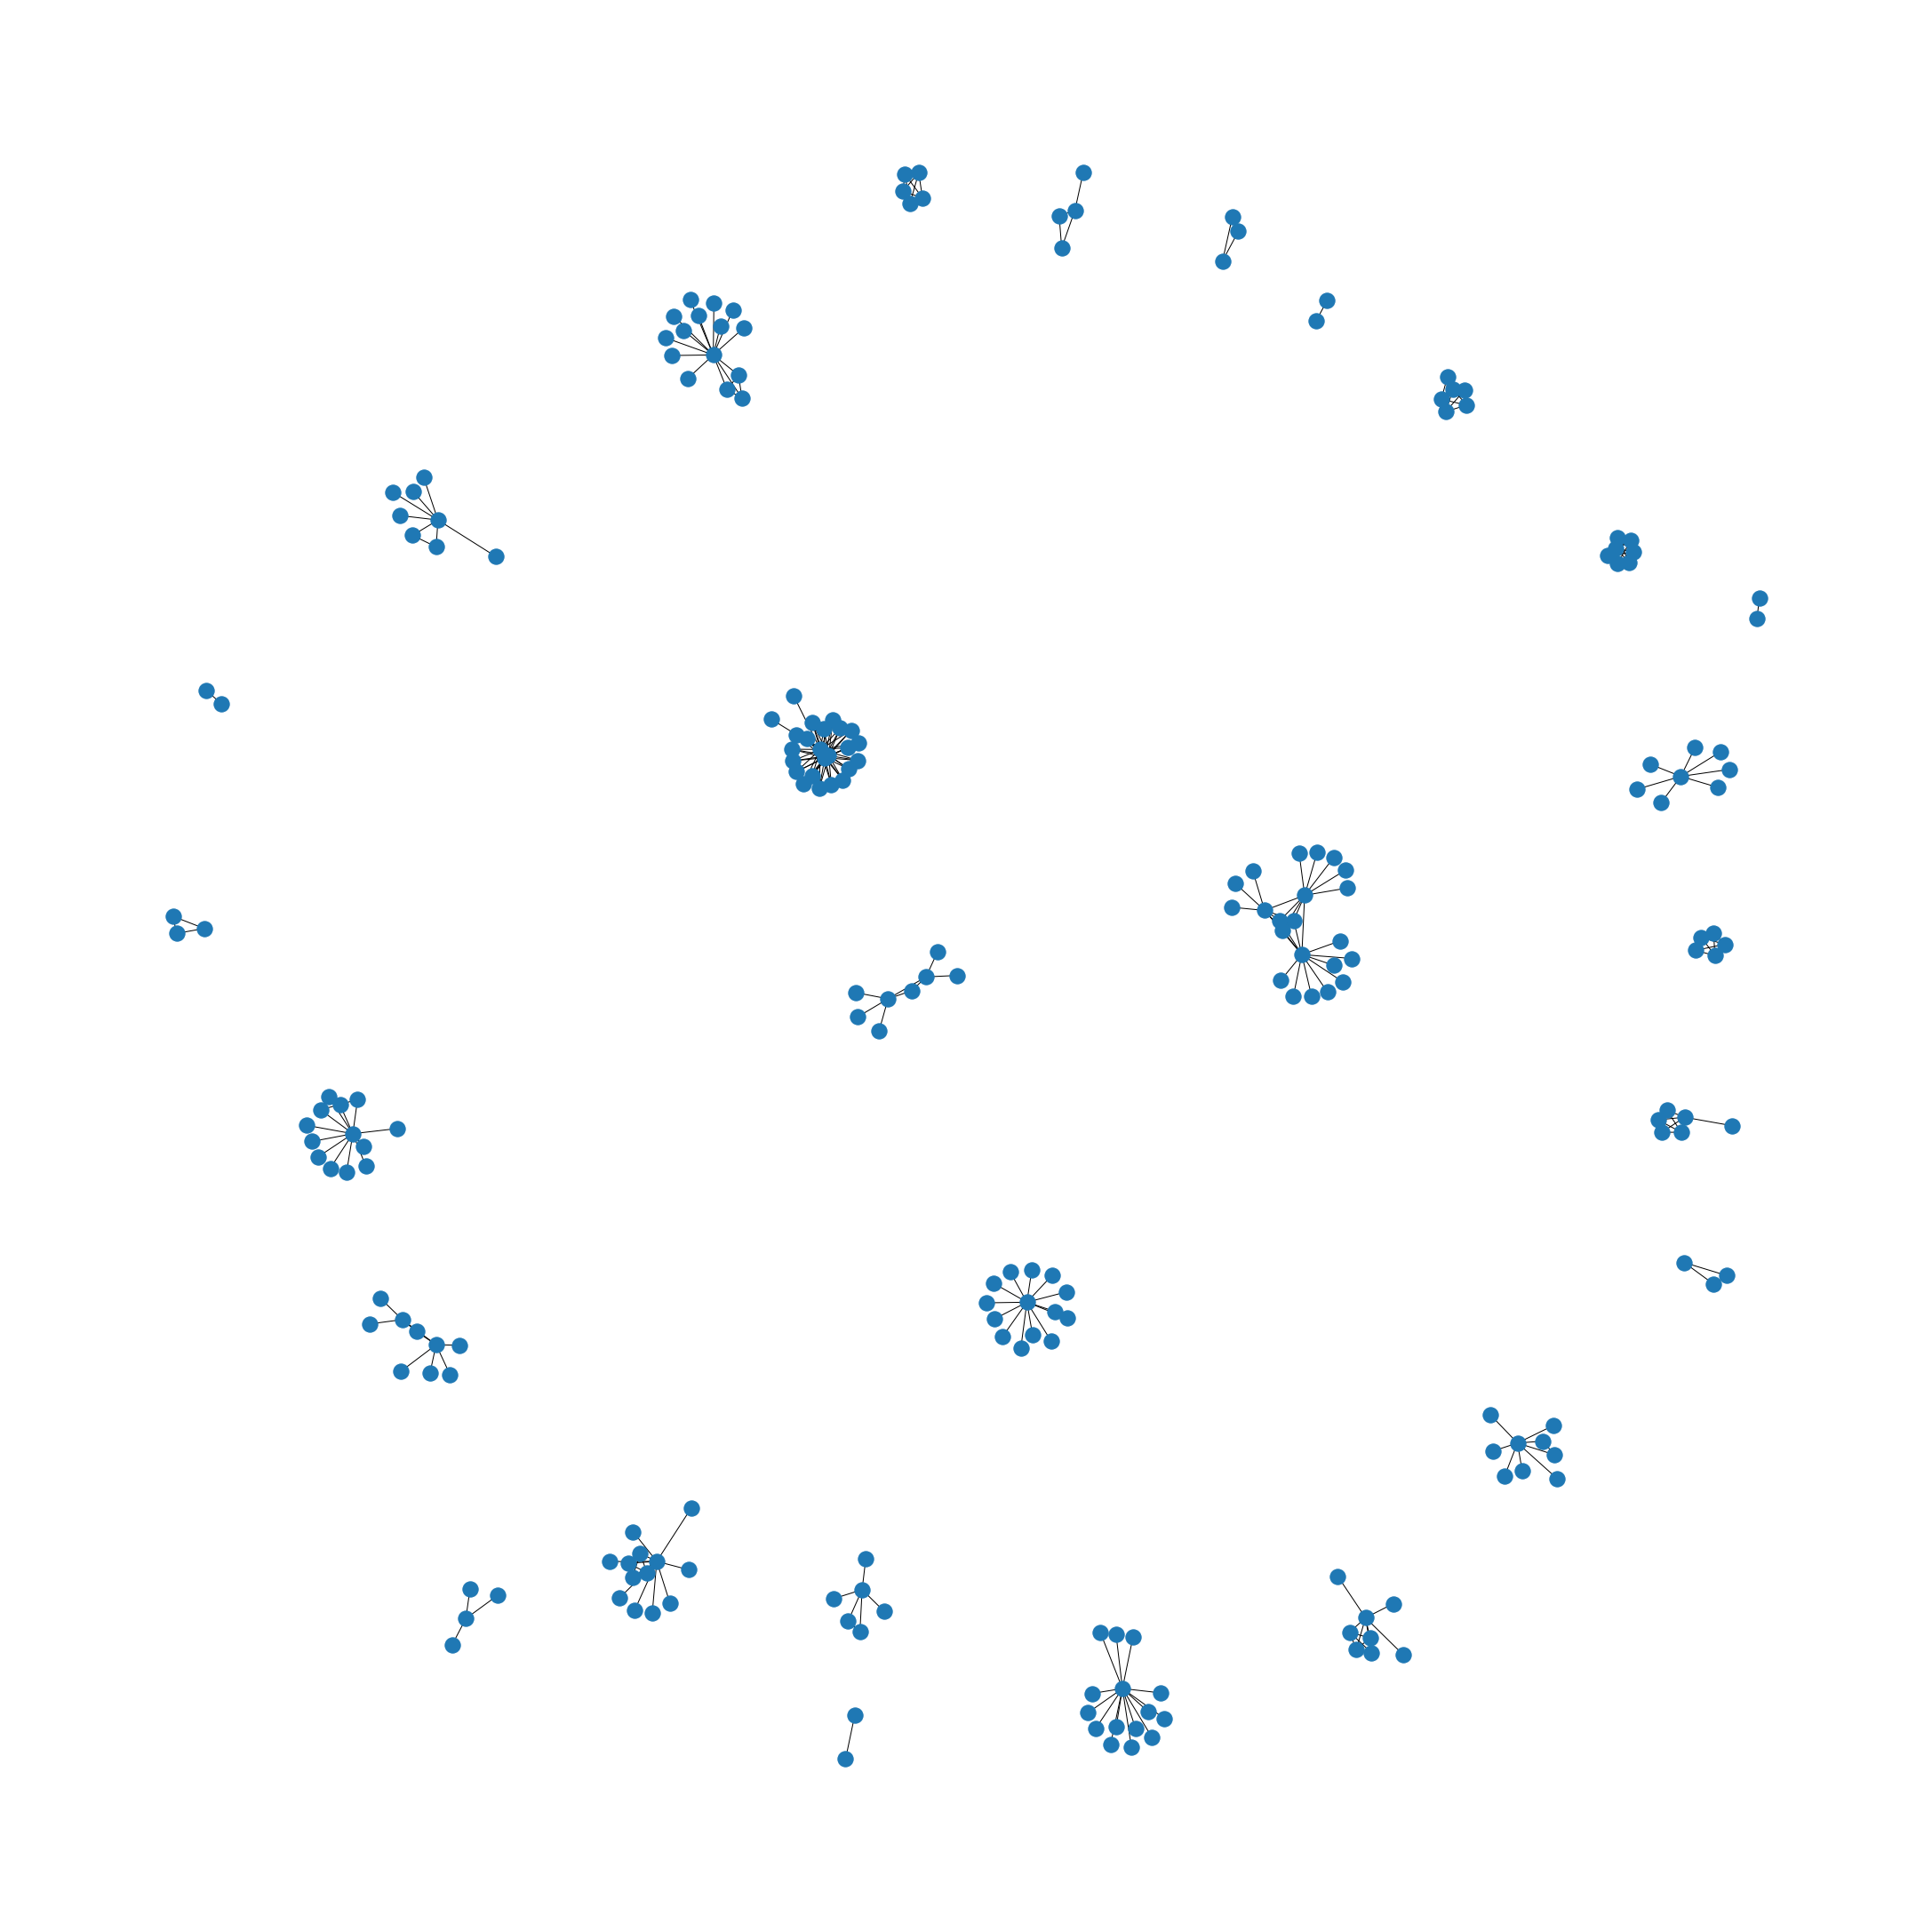

In [13]:
#known authors graph
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

for i in small_keys[:100]:
  for j in map[i]:
      #removing the self loop edges
      if i==j:
        continue
      else:  
           G.add_edge(i,j)

plt.figure(figsize=(30,30)) 
nx.draw(G)
plt.show()


In [ ]:
#for clique in nx.find_cliques(G):
#	print(clique,len(clique))

 

In [22]:
#processing data for paper citation graph
G = nx.DiGraph()
paper_citations={}
#for id,references in dblp_data[['id','references']].values:
#for sample data
for id,references in sample_df[['id','references']].values:
  if(type(references) == float):
      continue
  paper_citations[id]=references

paper_citation_graph=list(paper_citations.keys())
with open('/content/drive/MyDrive/datasets/graph2_pairs.csv','w',encoding='utf-8') as file:
  for i in paper_citation_graph:
    for j in paper_citations[i]:
      G.add_edge(i,j)
      file.writelines(str(i)+','+str(j)+'\n')
#plt.figure(figsize=(30,30)) 
#nx.draw(G)
#plt.show()      
#G.remove_edges_from(nx.selfloop_edges(G))  

In [15]:
#determining the degree centrality 3a

degree_centrality=nx.degree_centrality(G)
#determining top 5 papers that are cited most
dict(sorted(degree_centrality.items(), key=lambda item: item[1],reverse= True)[:5])


{'6d4c5b32-8e13-4022-b67f-1ace7ffc91d0': 0.0029221930633378254,
 '95d23404-e1cf-4109-b198-d69411f24369': 0.0014114476203986098,
 '60e14047-06db-4049-9ba3-1e7bdf90f195': 0.001234130080147528,
 '569d39e1-3106-44f6-84ef-7efe45c5a0e0': 0.0011064614511667493,
 '7d329745-49e6-459c-9e25-19597ced63e1': 0.0010355344350663168}

In [ ]:
#for manual calculation
#list=['1a2ad703-5ede-4fce-bf46-af4a3efd168d','eeca4ed1-6824-4d30-b1bf-b1d957fbfccc']


#sample_df[['references','id']][sample_df['id'].isin(list)]

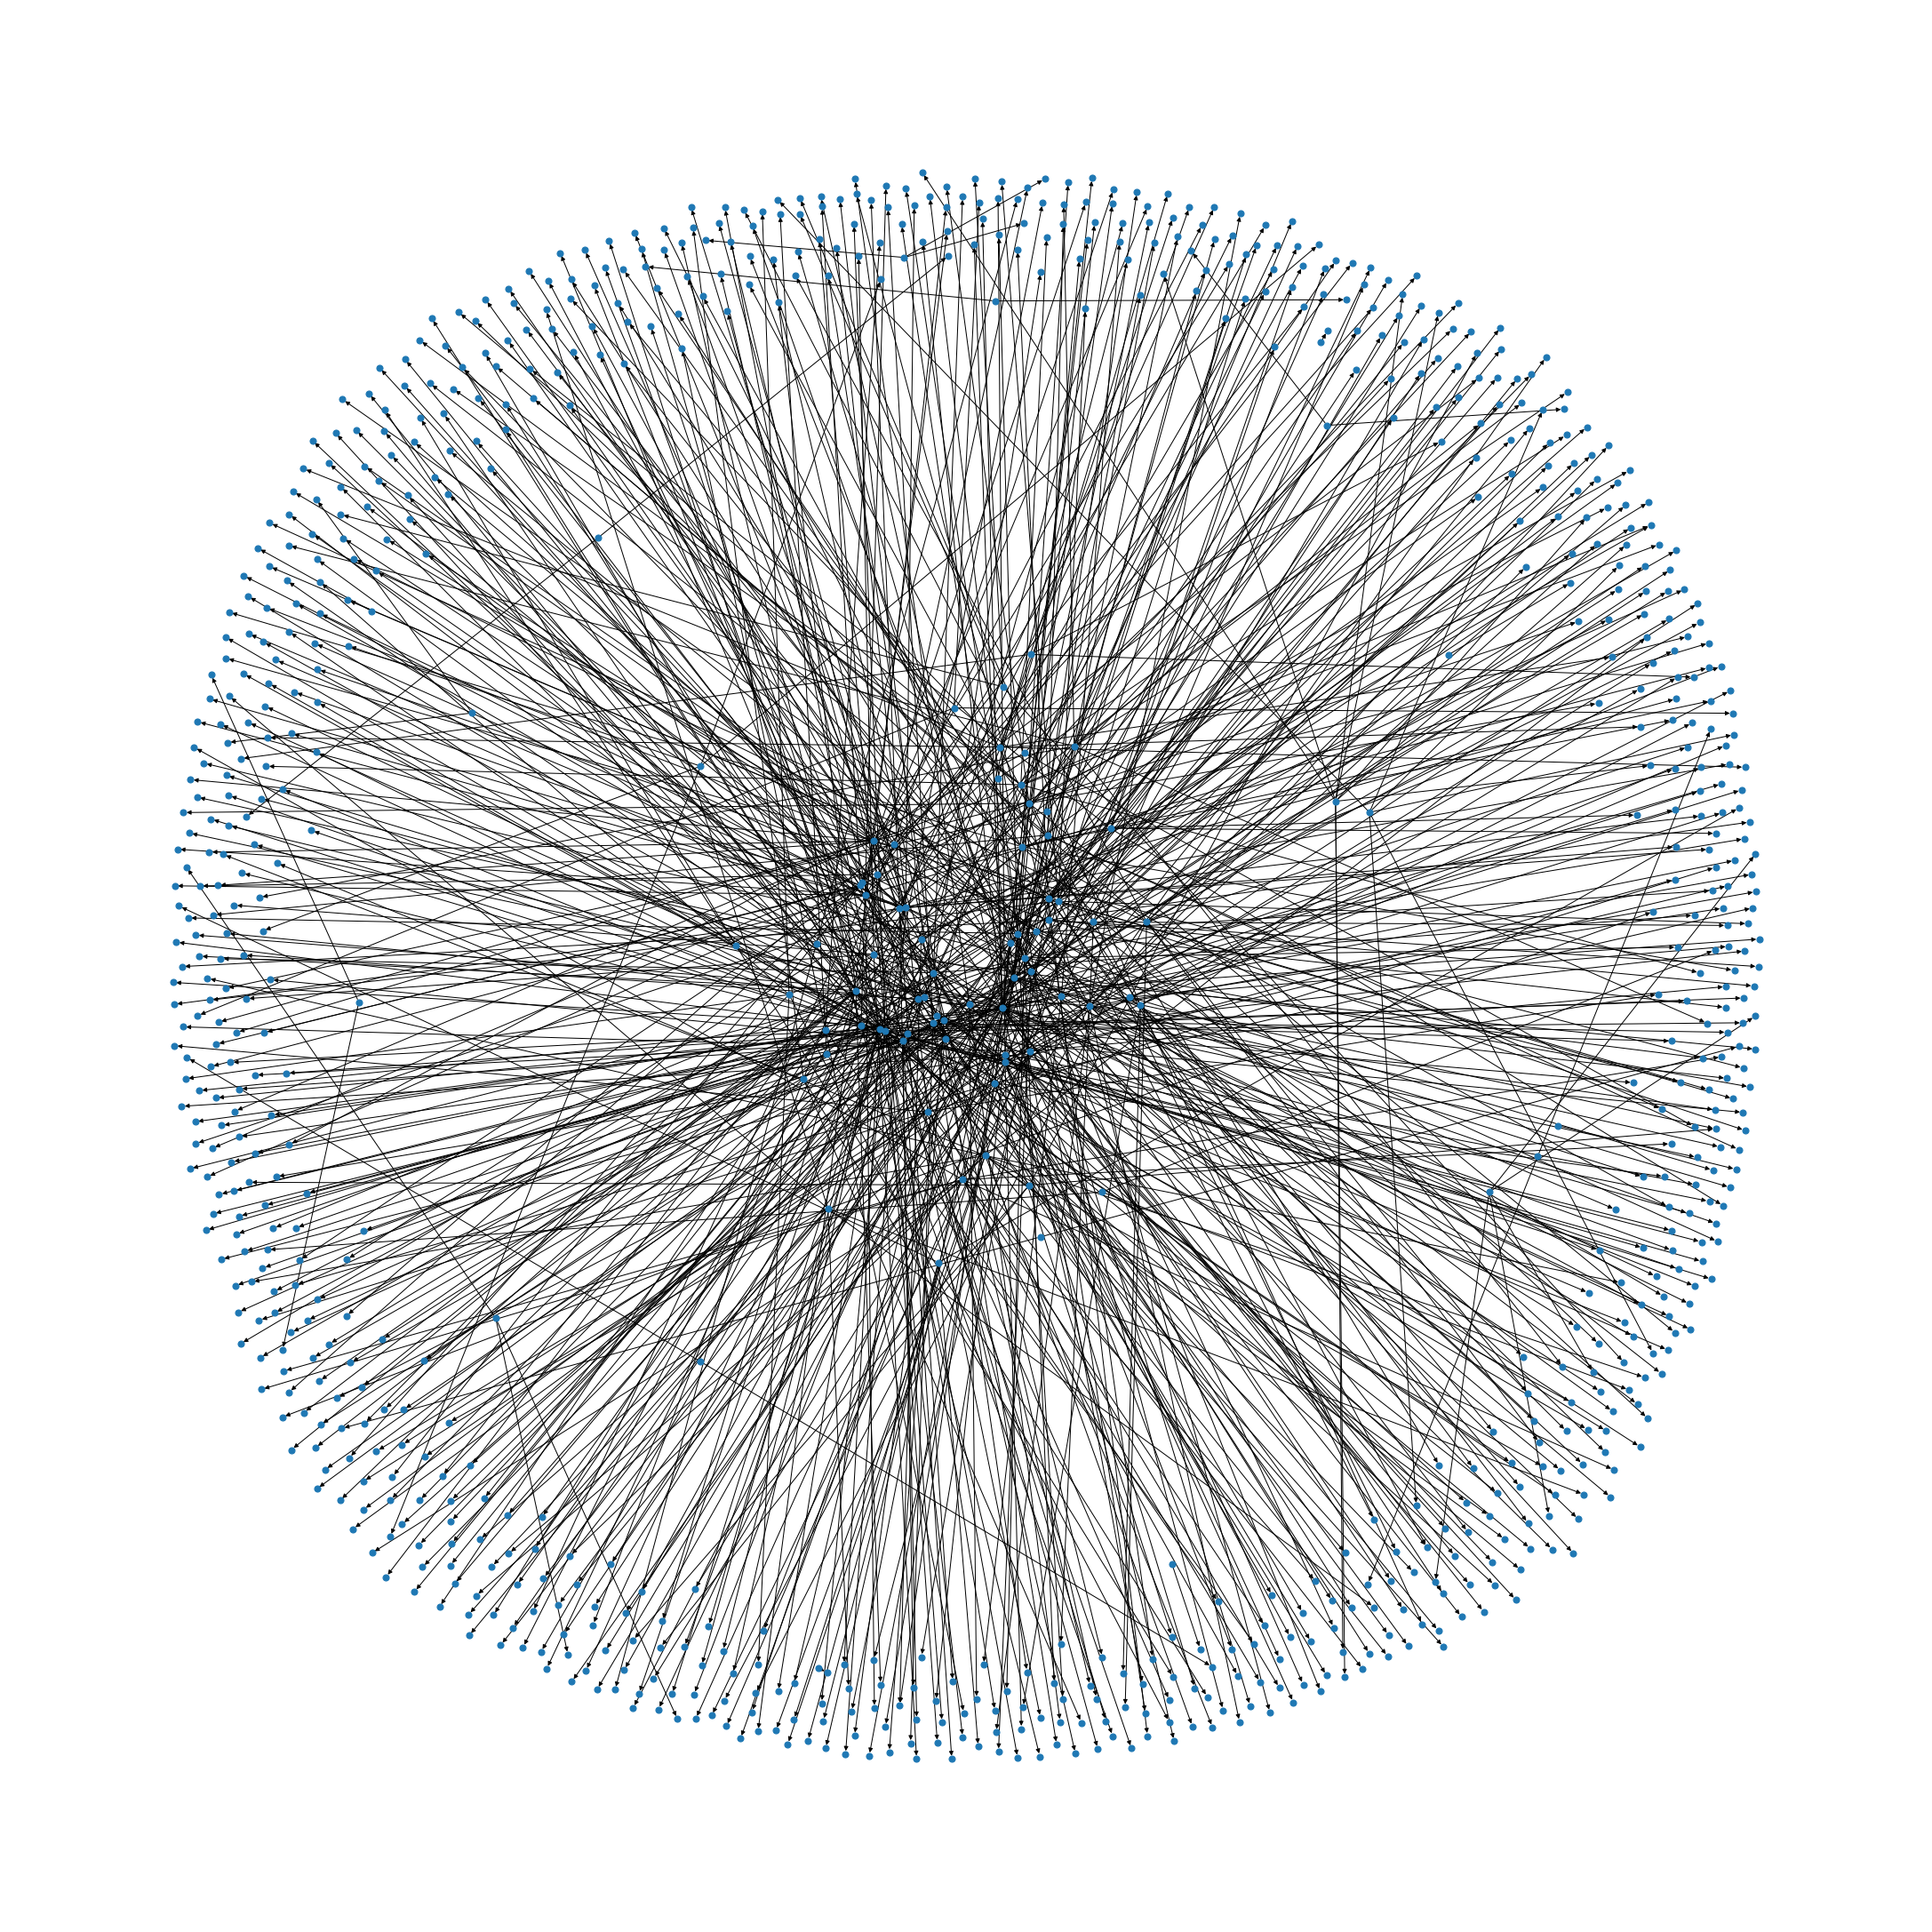

In [17]:
#ploting graph for paper citation
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
for i in paper_citation_graph[:100]:
  for j in paper_citations[i]:
    G.add_edge(i,j)
plt.figure(figsize=(30,30)) 
nx.draw(G,node_size=50)
plt.show()

In [18]:
#processing data for author venue graph
import numpy as np
with open('/content/drive/MyDrive/datasets/graph3_pairs.csv','w',encoding='utf-8') as file:
  for venue,authors in sample_df[['venue','authors']].values:
    if venue=='':
      continue
    if type(authors)==list:
      for author in authors:
        file.writelines(str(venue)+','+str(author)+'\n')



      
#G.remove_edges_from(nx.selfloop_edges(G))  

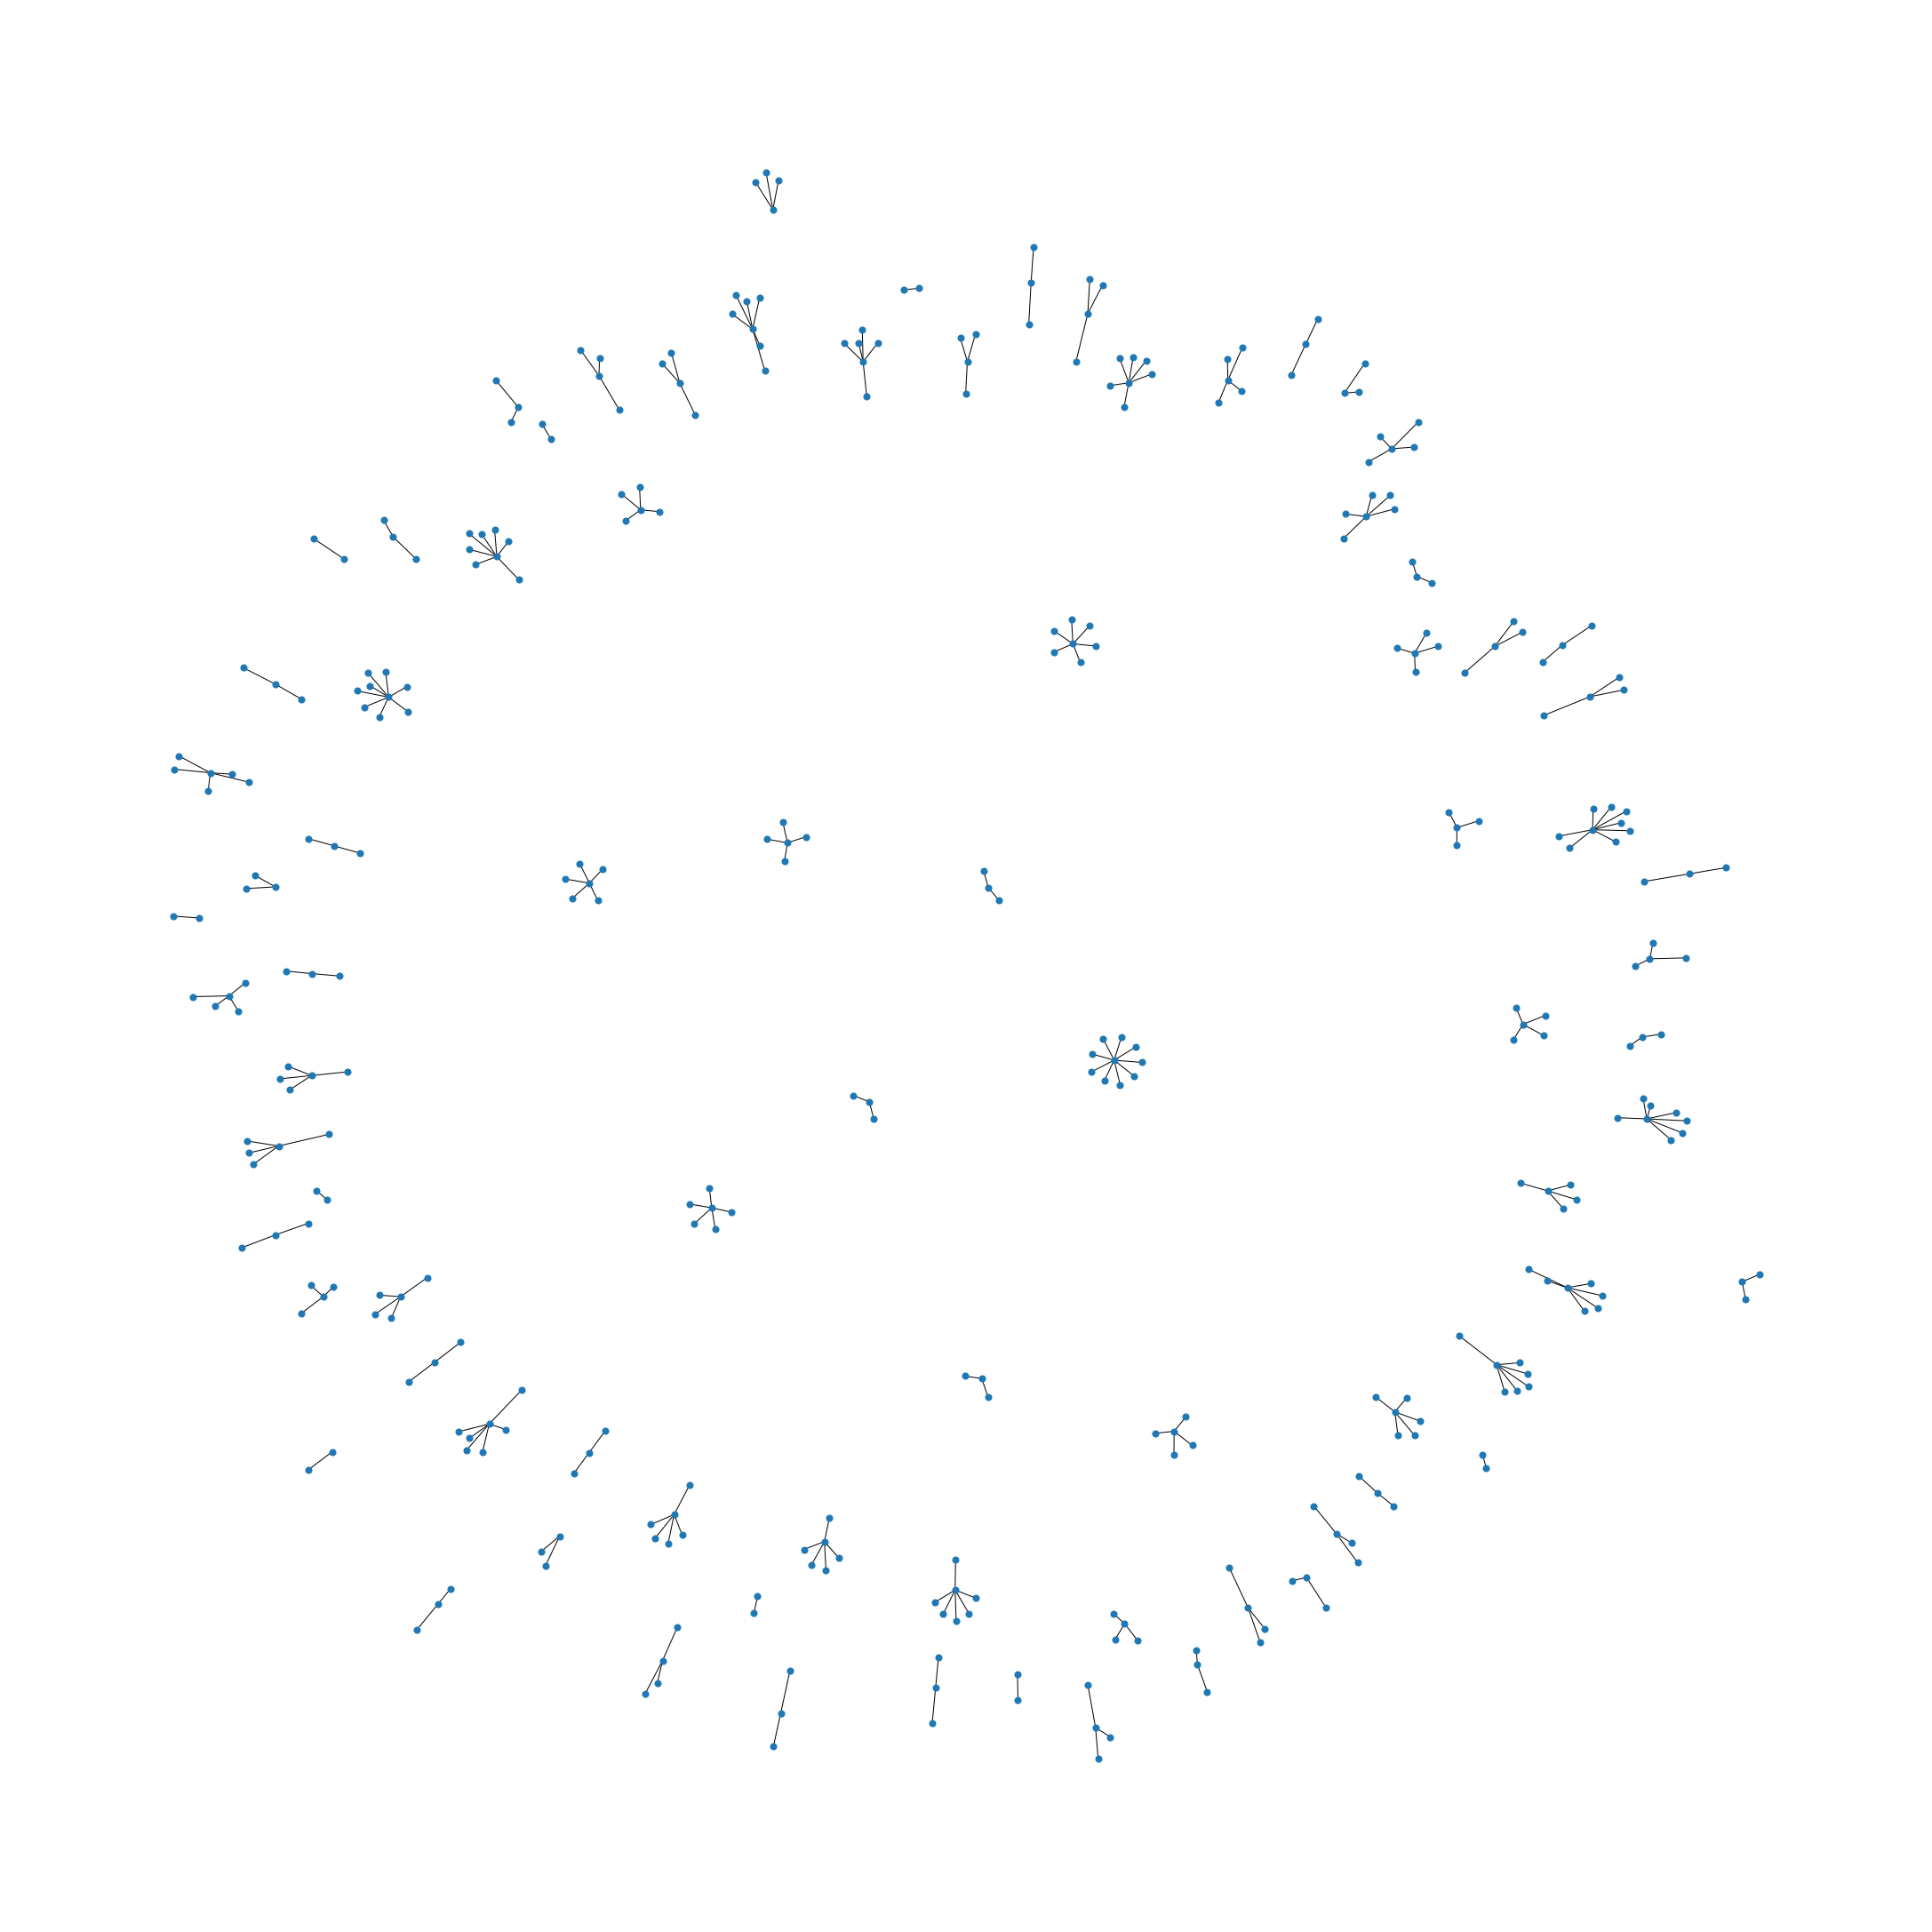

In [16]:
#ploting auther venue graph for 100 venues
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for venue,authors in sample_df[['venue','authors']].values[:100]:
  if venue=='':
    continue
  if type(authors)==list:
    for author in authors:
      G.add_edge(venue,author)
plt.figure(figsize=(30,30)) 
nx.draw(G,node_size=50)
plt.show()      

In [23]:
#
!python /content/drive/MyDrive/network_summary.py

Begin Network Summary


number of nodes of layer 0 : 45917
number of edges of layer 0: 48734
Number of Connected Component of layer 0   :786 
Density of layer 0  : 4.623006476441811e-05
End network summary. Additional files are written in the same directory as the output file.
number of nodes of layer 1 : 51601
number of edges of layer 1: 93342
Number of Connected Component of layer 1   :11100 
Density of layer 1  : 7.011311751214484e-05
End network summary. Additional files are written in the same directory as the output file.
number of nodes of layer 2 : 140991
number of edges of layer 2: 164895
Number of Connected Component of layer 2   :3490 
Density of layer 2  : 1.6590435304212102e-05
End network summary. Additional files are written in the same directory as the output file.
